In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

## input:艾美獎資料集(csv)

## goal:整理成可以與其他資料合併格式

## output:可合併資料集(csv)

In [2]:
Emmy_data = pd.read_csv('Emmy_Prime.csv')
# column字體大寫
Emmy_data = Emmy_data.rename(columns = str.title )
Emmy_data

,Award_Title,Years,Finalist,Winner,Groups
0,Outstanding Drama Series,2020 Awards,Succession,Winner,"Jesse Armstrong, (executive producer),, ,Adam ..."
1,Outstanding Drama Series,2020 Awards,Better Call Saul,NaN,"Peter Gould, (executive producer),, ,Vince Gil..."
2,Outstanding Drama Series,2020 Awards,Killing Eve,NaN,"Sally Woodward Gentle, (executive producer),, ..."
3,Outstanding Drama Series,2020 Awards,Ozark,NaN,"Jason Bateman, (executive producer),, ,Chris M..."
4,Outstanding Drama Series,2020 Awards,Stranger Things,NaN,"Iain Paterson, (executive producer),, ,Shawn L..."
...,...,...,...,...,...
22650,Most Outstanding Television Personality,1949 Awards,Patricia Morison,NaN,NaN
22651,Most Outstanding Television Personality,1949 Awards,Rita La Roy,NaN,NaN
22652,Most Popular Television Program,1949 Awards,Stump the Stars,Winner,Mike Stokey
22653,Most Popular Television Program,1949 Awards,Armchair Detective,NaN,NaN


## Rename Finalist to Title 

In [8]:
Emmy_data.rename(columns={"Finalist": "Title"},inplace=True)

In [4]:
def Clean_Years(data):
    # 得獎年份切割出來
    data.Years = data.Years.str.split().str.get(0)

    # 影集名稱統一為:Title
    data.rename(columns={'Finalist':'Title'},inplace=True)

    # 將winner 取代為1 沒得獎為0 
    data['Winner'] = data['Winner'].replace(np.nan,0)
    data['Winner'] = data['Winner'].replace('Winner',1)
    
    return data


# 得獎年份切割出來

In [3]:
Emmy_data.Years.str.split().str.get(0)

0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
22650    1949
22651    1949
22652    1949
22653    1949
22654    1949
Name: Years, Length: 22655, dtype: object

In [5]:
Clean_Years(Emmy_data)

,Award_Title,Years,Finalist,Winner,Groups
0,Outstanding Drama Series,2020,Succession,1,"Jesse Armstrong, (executive producer),, ,Adam ..."
1,Outstanding Drama Series,2020,Better Call Saul,0,"Peter Gould, (executive producer),, ,Vince Gil..."
2,Outstanding Drama Series,2020,Killing Eve,0,"Sally Woodward Gentle, (executive producer),, ..."
3,Outstanding Drama Series,2020,Ozark,0,"Jason Bateman, (executive producer),, ,Chris M..."
4,Outstanding Drama Series,2020,Stranger Things,0,"Iain Paterson, (executive producer),, ,Shawn L..."
...,...,...,...,...,...
22650,Most Outstanding Television Personality,1949,Patricia Morison,0,NaN
22651,Most Outstanding Television Personality,1949,Rita La Roy,0,NaN
22652,Most Popular Television Program,1949,Stump the Stars,1,Mike Stokey
22653,Most Popular Television Program,1949,Armchair Detective,0,NaN


# Winner欄位做類別型欄位做區分 Winner Nan ⇒ 1 & 0

In [24]:
# 將winner 取代為1 沒得獎為0
Emmy_data['Winner'] = Emmy_data['Winner'].replace(np.nan,0)
Emmy_data['Winner'] = Emmy_data['Winner'].replace('Winner',1)

In [25]:
Emmy_data

,Award_Title,Years,Finalist,Winner,Groups
0,Outstanding Drama Series,2020,Succession,1,"Jesse Armstrong, (executive producer),, ,Adam ..."
1,Outstanding Drama Series,2020,Better Call Saul,0,"Peter Gould, (executive producer),, ,Vince Gil..."
2,Outstanding Drama Series,2020,Killing Eve,0,"Sally Woodward Gentle, (executive producer),, ..."
3,Outstanding Drama Series,2020,Ozark,0,"Jason Bateman, (executive producer),, ,Chris M..."
4,Outstanding Drama Series,2020,Stranger Things,0,"Iain Paterson, (executive producer),, ,Shawn L..."
...,...,...,...,...,...
22650,Most Outstanding Television Personality,1949,Patricia Morison,0,NaN
22651,Most Outstanding Television Personality,1949,Rita La Roy,0,NaN
22652,Most Popular Television Program,1949,Stump the Stars,1,Mike Stokey
22653,Most Popular Television Program,1949,Armchair Detective,0,NaN


## Groups 為導演團隊⇒ 取出前三名導演

In [27]:
# 資料清洗 groups
o = 0
while o < len(Emmy_data):
    word = ''
    for i in str(Emmy_data['Groups'][o]).split(',,'):
        if i != '':
            word += i.lstrip(' ,').split(',')[0] + ','
            Emmy_data.loc[o,'Groups'] = word.rstrip(',')
    print(o)
    o += 1

1
19322
19323
19324
19325
19326
19327
19328
19329
19330
19331
19332
19333
19334
19335
19336
19337
19338
19339
19340
19341
19342
19343
19344
19345
19346
19347
19348
19349
19350
19351
19352
19353
19354
19355
19356
19357
19358
19359
19360
19361
19362
19363
19364
19365
19366
19367
19368
19369
19370
19371
19372
19373
19374
19375
19376
19377
19378
19379
19380
19381
19382
19383
19384
19385
19386
19387
19388
19389
19390
19391
19392
19393
19394
19395
19396
19397
19398
19399
19400
19401
19402
19403
19404
19405
19406
19407
19408
19409
19410
19411
19412
19413
19414
19415
19416
19417
19418
19419
19420
19421
19422
19423
19424
19425
19426
19427
19428
19429
19430
19431
19432
19433
19434
19435
19436
19437
19438
19439
19440
19441
19442
19443
19444
19445
19446
19447
19448
19449
19450
19451
19452
19453
19454
19455
19456
19457
19458
19459
19460
19461
19462
19463
19464
19465
19466
19467
19468
19469
19470
19471
19472
19473
19474
19475
19476
19477
19478
19479
19480
19481
19482
19483
19484
19485
19486
19487
19

## 取出前三名導演

In [30]:
# 將groups 分出 Director_1
Emmy_data['Director_1'] = Emmy_data['Groups'].str.split(',').str.get(0)

In [33]:
Emmy_data['Director_2'] = Emmy_data['Groups'].str.split(',').str.get(1)

In [35]:
Emmy_data['Director_3'] = Emmy_data['Groups'].str.split(',').str.get(2)

In [36]:
missing_values_count = Emmy_data.isnull().sum()
missing_values_count[0:10]

Award_Title       83
Years              0
Title            154
Winner             0
Groups             0
Director_1         0
Director_2     12878
Director_3     15414
dtype: int64

In [38]:
# 刪除 入圍者為 na 項目
Emmy_data['Title'] = Emmy_data['Title'].dropna()

In [40]:
# data schema transfrom 
Emmy_data['Years'] = Emmy_data['Years'].astype(str).astype(int)

## 將獎項欄位進行 one-Hot Encoding 轉換

In [51]:
awards = pd.get_dummies(Emmy_data.Award_Title)
awards

,Achievements in Daytime Programming - Programs,Achievements in Educational Television - Individuals,Achievements in Educational Television - Programs,Actor - Best Single Performance - Lead or Support,Actor of the Year - Series,Actor of the Year - Special,Actress - Best Single Performance - Lead or Support,Actress of the Year - Series,Actress of the Year - Special,Art Director and Set Decorator of the Year,...,Special Classification of Outstanding Program and Individual Achievement - General Programming,Special Classification of Outstanding Program and Individual Achievement - Individuals,Special Classification of Outstanding Program and Individual Achievement - Programs,Special Classification of Outstanding Program and Individual Achievements - Programs,Special Classifications of Individual Achievements,Supporting Actor of the Year,Supporting Actress of the Year,The Program of the Year,Writer of the Year - Series,Writer of the Year - Special
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22650,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22651,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
Emmy_data = pd.concat([Emmy_data,awards],axis=1)
Emmy_data

,Award_Title,Years,Title,Winner,Groups,Director_1,Director_2,Director_3,Achievements in Daytime Programming - Programs,Achievements in Educational Television - Individuals,...,Special Classification of Outstanding Program and Individual Achievement - General Programming,Special Classification of Outstanding Program and Individual Achievement - Individuals,Special Classification of Outstanding Program and Individual Achievement - Programs,Special Classification of Outstanding Program and Individual Achievements - Programs,Special Classifications of Individual Achievements,Supporting Actor of the Year,Supporting Actress of the Year,The Program of the Year,Writer of the Year - Series,Writer of the Year - Special
0,Outstanding Drama Series,2020,Succession,1,"Jesse Armstrong,Adam McKay,Will Ferrell,Frank ...",Jesse Armstrong,Adam McKay,Will Ferrell,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Outstanding Drama Series,2020,Better Call Saul,0,"Peter Gould,Vince Gilligan,Mark Johnson,Thomas...",Peter Gould,Vince Gilligan,Mark Johnson,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Outstanding Drama Series,2020,Killing Eve,0,"Sally Woodward Gentle,Lee Morris,Phoebe Waller...",Sally Woodward Gentle,Lee Morris,Phoebe Waller-Bridge,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Outstanding Drama Series,2020,Ozark,0,"Jason Bateman,Chris Mundy,Bill Dubuque,Mark Wi...",Jason Bateman,Chris Mundy,Bill Dubuque,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Outstanding Drama Series,2020,Stranger Things,0,"Iain Paterson,Shawn Levy,Dan Cohen,Matt Duffer...",Iain Paterson,Shawn Levy,Dan Cohen,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22650,Most Outstanding Television Personality,1949,Patricia Morison,0,nan,nan,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
22651,Most Outstanding Television Personality,1949,Rita La Roy,0,nan,nan,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
22652,Most Popular Television Program,1949,Stump the Stars,1,Mike Stokey,Mike Stokey,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
22653,Most Popular Television Program,1949,Armchair Detective,0,nan,nan,NaN,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
''' 以得獎者與得獎影集做區分 假如說得獎者為人 group 會是影集名稱  假如是影集會是 製作團隊
    現在要將得獎者為人的title 換成影集'''

' 以得獎者與得獎影集做區分 假如說得獎者為人 group 會是影集名稱  假如是影集會是 製作團隊\n    現在要將得獎者為人的title 換成影集'

In [54]:
# 列出最常出現前10名
title_counts = Emmy_data['Award_Title'].value_counts()
title_counts[:10]

Outstanding Comedy Series                            284
Outstanding Drama Series                             253
Outstanding Lead Actress in a Comedy Series          247
Outstanding Lead Actor in a Comedy Series            244
Outstanding Lead Actress in a Drama Series           243
Outstanding Lead Actor in a Drama Series             243
Outstanding Supporting Actor in a Drama Series       228
Outstanding Supporting Actress in a Drama Series     224
Outstanding Supporting Actress in a Comedy Series    210
Outstanding Children's Program                       209
Name: Award_Title, dtype: int64

<AxesSubplot:>

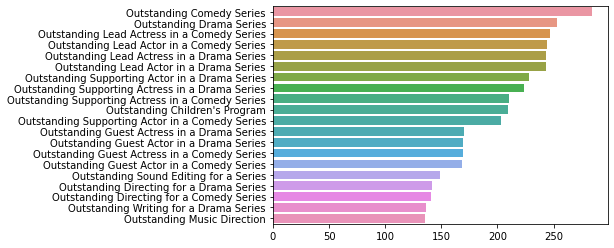

In [55]:
# 將前20名最多入圍獎列出
subset = title_counts[:20]
sns.barplot(y = subset.index , x = subset.values)

## 將資料存放到資料庫給另一位夥伴